In [ ]:
 ##pip install spacy

In [ ]:
##pip install dataclasses

In [ ]:
 pip install -U pydantic spacy

In [1]:
# IMPORTING SOME LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import spacy
import random
import math
import time
import datetime
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
!pip install distance
import distance
from tqdm import tqdm
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()


import plotly.express as px
import plotly.graph_objects as go


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df_train=pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q8\train.csv')
print('Shape of the data:',df_train.shape)
df_train.head()

Shape of the data: (404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<AxesSubplot:xlabel='is_duplicate'>

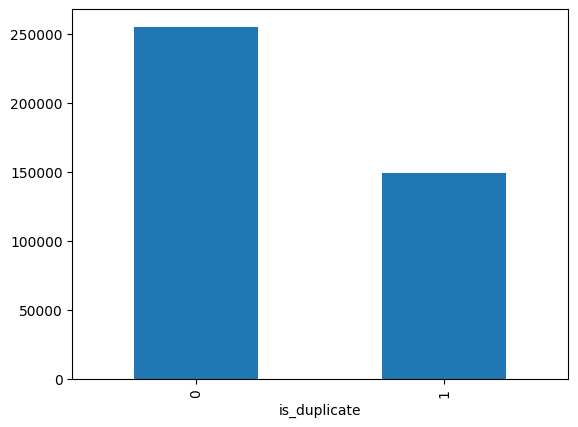

In [3]:
df_train.groupby("is_duplicate")['id'].count().plot.bar()

In [4]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



C:\Users\pc\AppData\Local\Temp\ipykernel_3144\1232299861.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Maximum number of times a single question is repeated: 157



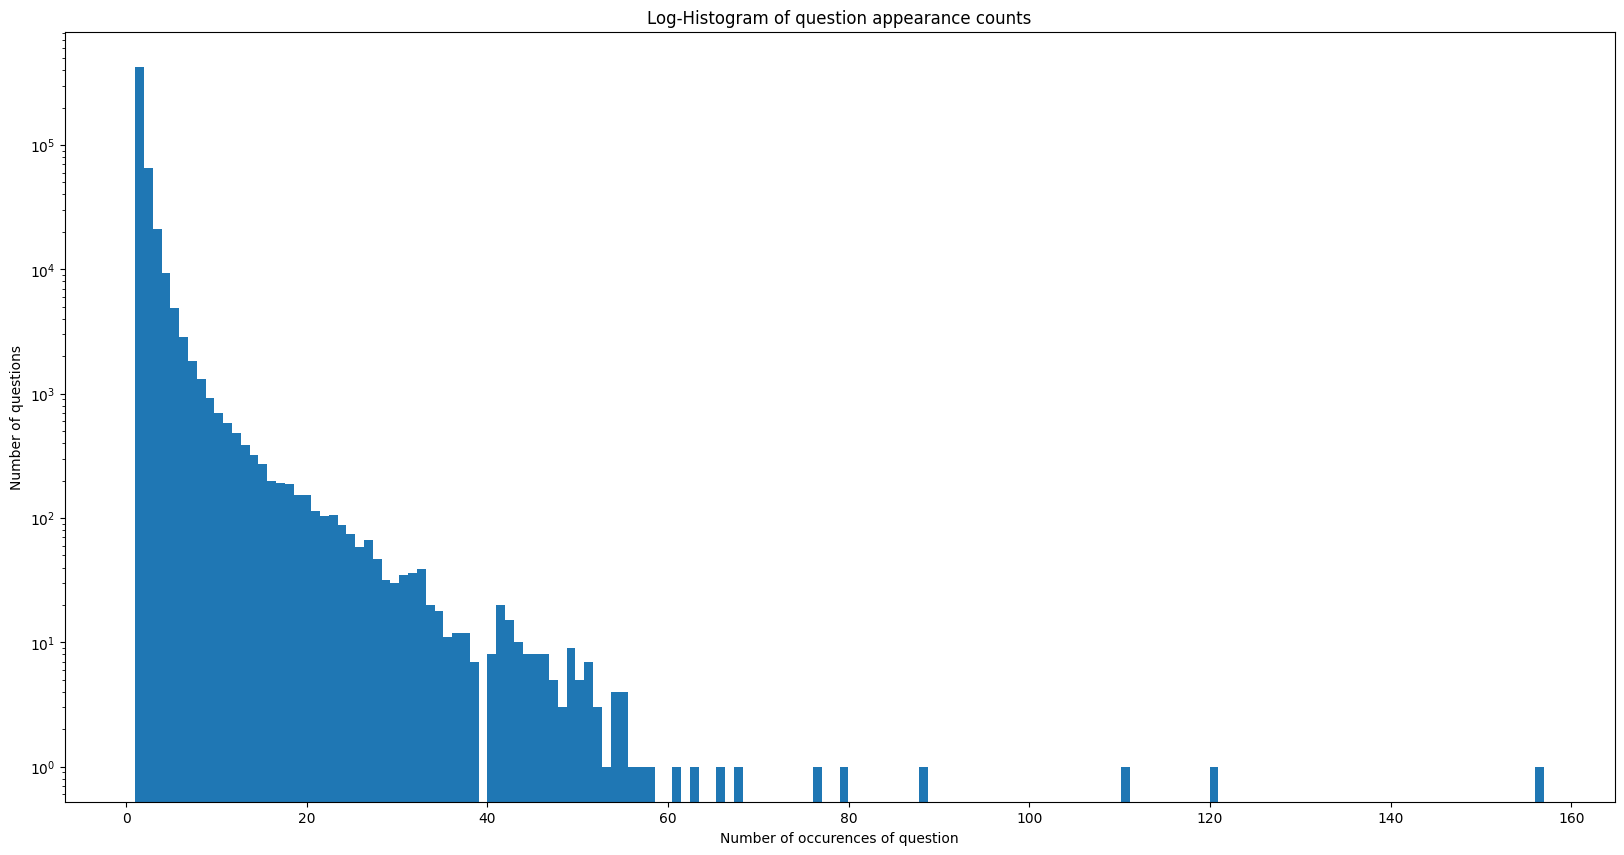

In [6]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [7]:
df_test=pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q8\test.csv')
print('Shape of the data:',df_test.shape)
df_test.head()

Shape of the data: (2345796, 3)


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [8]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)


In [11]:
pip install --upgrade pip



     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.1 MB 4.2 MB/s eta 0:00:01
     ----- ---------------------------------- 0.3/2.1 MB 3.5 MB/s eta 0:00:01
     ---------- ----------------------------- 0.5/2.1 MB 4.2 MB/s eta 0:00:01
     ---------------- ----------------------- 0.8/2.1 MB 5.2 MB/s eta 0:00:01
     --------------------- ------------------ 1.1/2.1 MB 5.0 MB/s eta 0:00:01
     --------------------------- ------------ 1.4/2.1 MB 5.3 MB/s eta 0:00:01
     -------------------------------- ------- 1.7/2.1 MB 5.4 MB/s eta 0:00:01
     ------------------------------------- -- 1.9/2.1 MB 5.3 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.

In [12]:

pip install --upgrade Pillow

                                              0.0/2.5 MB ? eta -:--:--
     -                                        0.1/2.5 MB 2.2 MB/s eta 0:00:02
     ----                                     0.3/2.5 MB 2.6 MB/s eta 0:00:01
     -------                                  0.5/2.5 MB 3.1 MB/s eta 0:00:01
     -----------                              0.7/2.5 MB 3.7 MB/s eta 0:00:01
     ---------------                          1.0/2.5 MB 4.2 MB/s eta 0:00:01
     --------------------                     1.3/2.5 MB 4.3 MB/s eta 0:00:01
     ------------------------                 1.5/2.5 MB 4.7 MB/s eta 0:00:01
     ----------------------------             1.8/2.5 MB 4.6 MB/s eta 0:00:01
     ---------------------------------        2.1/2.5 MB 5.0 MB/s eta 0:00:01
     ------------------------------------     2.3/2.5 MB 5.0 MB/s eta 0:00:01
     ---------------------------------------  2.5/2.5 MB 5.0 MB/s eta 0:00:01
     ---------------------------------------  2.5/2.5 MB 5.0 MB/s eta 0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\pc\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [13]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white',width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(15, 8))
plt.imshow(cloud)
plt.axis('off')

ValueError: Only supported for TrueType fonts

In [ ]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [ ]:
df_train=df_train.fillna(' ')

In [ ]:
df_train.isnull().sum()

In [ ]:
df1=df_train
df1

In [ ]:
df1['freq_qid1'] = df1.groupby('qid1')['qid1'].transform('count') 
df1['freq_qid2'] = df1.groupby('qid2')['qid2'].transform('count')
df1['q1len'] = df1['question1'].str.len() 
df1['q2len'] = df1['question2'].str.len()
df1['q1_n_words'] = df1['question1'].apply(lambda row: len(row.split(" ")))
df1['q2_n_words'] = df1['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_Common(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)
df1['word_Common'] = df1.apply(normalized_word_Common, axis=1)

def normalized_word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * (len(w1) + len(w2))
df1['word_Total'] = df1.apply(normalized_word_Total, axis=1)

def normalized_word_share(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df1['word_share'] = df1.apply(normalized_word_share, axis=1)

df1['freq_q1+q2'] = df1['freq_qid1']+df1['freq_qid2']
df1['freq_q1-q2'] = abs(df1['freq_qid1']-df1['freq_qid2'])

In [ ]:
df1.head()

In [ ]:
SAFE_DIV = 0.0001  #saving from dividing by 0.

def createAdvancedFeatures(ques1, ques2):
    featureValues = [0.0]*11
    
    ques1_words = ques1.split()
    ques2_words = ques2.split()
    
    if len(ques1_words) == 0 or len(ques2_words) == 0:
        return featureValues
    
    ques1_words_set = set(ques1.split())
    ques2_words_set = set(ques2.split())
    
    featureValues[0] = len(ques1_words_set.intersection(ques2_words_set)) / (min(len(ques1_words_set), len(ques2_words_set)) + SAFE_DIV)
    featureValues[1] = len(ques1_words_set.intersection(ques2_words_set)) / (max(len(ques1_words_set), len(ques2_words_set)) + SAFE_DIV)
    featureValues[2] = int(ques1_words[-1] == ques2_words[-1])
    featureValues[3] = int(ques1_words[0] == ques2_words[0])
    featureValues[4] = abs(len(ques1_words) - len(ques2_words))
    featureValues[5] = (len(ques1_words) + len(ques2_words))/2
    featureValues[6] = fuzz.ratio(ques1, ques2)
    featureValues[7] = fuzz.partial_ratio(ques1, ques2)
    featureValues[8] = fuzz.token_sort_ratio(ques1, ques2)
    featureValues[9] = fuzz.token_set_ratio(ques1, ques2)
    
    strs = list(distance.lcsubstrings(ques1, ques2)) # https://github.com/doukremt/distance/blob/master/distance/_lcsubstrings.py
    if len(strs) == 0:
        featureValues[10] = 0
    else:
        featureValues[10] = len(strs[0]) / (min(len(ques1), len(ques1)) + SAFE_DIV)
        
    return featureValues

In [ ]:
advFeatures = df1.apply(lambda x: createAdvancedFeatures(x["question1"], x["question2"]), axis=1)

df1["CWC_Min"] = list(map(lambda x: x[0], advFeatures))
df1["CWC_Max"] = list(map(lambda x: x[1], advFeatures))
df1["Last_Word_Equality"] = list(map(lambda x: x[2], advFeatures))
df1["First_Word_Equality"] = list(map(lambda x: x[3], advFeatures))
df1["Abs_Len_Diff"] = list(map(lambda x: x[4], advFeatures))
df1["Mean_Len"] = list(map(lambda x: x[5], advFeatures))
df1["Fuzz_Ratio"] = list(map(lambda x: x[6], advFeatures))
df1["Fuzz_Partial_Ratio"] = list(map(lambda x: x[7], advFeatures))
df1["Token_Sort_Ratio"] = list(map(lambda x: x[8], advFeatures))
df1["Token_Set_Ratio"] = list(map(lambda x: x[9], advFeatures))
df1["Longest_Substr_Ratio"] = list(map(lambda x: x[10], advFeatures))

df1.fillna("")
#data_new.to_csv(os.path.join(DATAPATH, DATA_ADV), index = False)

In [ ]:
df1.to_csv('D:\ineuron\Placement related assignment\sample code\Q8\train_preprocessed.csv')


In [ ]:
df_1=df1

In [ ]:
labels = df1['is_duplicate'].values
df_1=df_1.drop(['freq_qid1','freq_qid2','id','qid1','qid2','question1','question2','is_duplicate'],axis=1)
df_1

In [ ]:
import xgboost as xgb
X = df_1
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)

xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_valid)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

In [ ]:
df2=pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q8\train.csv')

In [ ]:
df2['question1'] = df2['question1'].apply(lambda x: str(x))
df2['question2'] = df2['question2'].apply(lambda x: str(x))
df2.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df2['question1']) + list(df2['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [ ]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df2['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df2['q1_feats_m'] = list(vecs1)

In [ ]:
vecs2 = []
for qu2 in tqdm(list(df2['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df2['q2_feats_m'] = list(vecs2)

In [ ]:
df=pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q8\train.csv')
df = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df

In [ ]:
df3_q1 = pd.DataFrame(df2.q1_feats_m.values.tolist(), index= df.index)
df3_q2 = pd.DataFrame(df2.q2_feats_m.values.tolist(), index= df.index)

In [ ]:
print(df1.shape)
df1.head()

In [ ]:
df3_q1.head()

In [ ]:
df3_q2.head()

In [ ]:
df3_q1['id']=df1['id']
df3_q2['id']=df1['id']
df3_q1

In [ ]:
df2  = df3_q1.merge(df3_q2, on='id',how='left')
df2

In [ ]:
result  = df1.merge(df2, on='id',how='left')

In [ ]:
result

In [ ]:
result.to_csv('D:\ineuron\Placement related assignment\sample code\Q8\final_preprocessed.csv')


In [ ]:
df_train=pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q8\final_preprocessed.csv')
print('Shape of the data:',df_train.shape)
df_train.head()

In [ ]:
df=df_train

In [ ]:
print(df.columns)

In [ ]:
labels = df['is_duplicate'].values
df=df.drop(['Unnamed: 0','freq_qid1','freq_qid2','id','qid1','qid2','question1','question2','is_duplicate'],axis=1)
df

In [ ]:
import xgboost as xgb
X = df
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)

xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_valid)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(y, xgb_model.predict(X))) 

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y, xgb_model.predict(X))

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()